<a href="https://colab.research.google.com/github/piyush02nir/World_Bank_Global_Education/blob/main/World_Bank_Global_Education_Analysis_Self_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>


#**In this project we are going to analyze the World Bank EdStats Data in order to find out valuable insights.**

#**The following Indicators have been chosen for analysis:-**

##Economy:-

GDP at market prices (current US$)	NY.GDP.MKTP.CD

GDP per capita (current US$)	NY.GDP.PCAP.CD

##Early Childhood Education:-

Out-of-school children of primary school age, both sexes (number)	SE.PRM.UNER

Enrolment in pre-primary education, female (number)	SE.PRE.ENRL.FE

Enrolment in secondary education, female (number)	SE.SEC.ENRL.FE

Enrolment in tertiary education, all programmes, female (number)	SE.TER.ENRL.FE

Pupil-teacher ratio in primary education (headcount basis)	SE.PRM.ENRL.TC.ZS

##Expenditures:-

Government expenditure on education as % of GDP (%) - SE.XPD.TOTL.GD.ZS

Expenditure on education as % of total government expenditure (%) SE.XPD.TOTL.GB.ZS

##Literacy among working population:-

Labor force, total	SL.TLF.TOTL.IN

Population:-

Population growth (annual %)  SP.POP.GROW

##Learning Outcomes:-

PISA: Mean performance on the Reading scale (number) - LO.PISA.REA

PISA: Mean performance on the Mathematics scale (number) - LO.PISA.MAT

#Importing Necessary Modules and Libraries

We are importing following libraries for their respective applications:

Pandas:- Pandas is used to analyze data. It has functions for analyzing, cleaning, exploring, and manipulating data.

Matplotlib:- Matplotlib is a graph plotting library in python that serves as a visualization utility. Most of the Matplotlib utilities lies under the pyplot submodule.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Loading and Discovering Data**


---


Now, we need to load our data from the external source, which in this case is uploaded to the drive. Also we would try to spot the nature and properties of the data that we have. The data is divided into 5 different CSV files, each containing the information as follows:

**1.EdStatsData**:- This file contains Education Statistics data (from ear 1970 to 2100) of all the countries that are World Bank members and this data is dependent on various indicators that resembles various factors that affect the overall Education growth and development of the country. These indicators can be access, availabilty, teachers, expenditures, population, lieracy, assessments etc.

**2.EdStatsCountry**:- This file contains information from census and surveys across various departments, segregated in a country-wise manner

**3.EdStatsCountry-Series**:- This file contains the Series Code for various indicators, as well as the Data sources from which they have been derived

**4.EdStatsFootNote**:- This file contains year wise indicator names along with their respective descrption. It tells us the nature of the indicators, if its and estimate value or a percentage distribution etc. From context of our analysis this information isn't quite useful, since its already evident with the type of data EdStatsData holds.

**5.EdStatsSeries**:- This file contains regional learning assessments data(e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data.

In [3]:
path1=('/content/drive/MyDrive/projects..../EdStatsCountry-Series.csv')
path2=('/content/drive/MyDrive/projects..../EdStatsCountry.csv')
path3=('/content/drive/MyDrive/AlmaBetter/Projects/Capston_project_World_bank_Global_Education/WorldBank Global Education Analysis/data/EdStatsData.csv')
path4=('/content/drive/MyDrive/projects..../EdStatsFootNote.csv')
path5=('/content/drive/MyDrive/projects..../EdStatsSeries.csv')

In [4]:
main_data=pd.read_csv(path3)

***Getting overview of data***

In [5]:
main_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [6]:
# Droppe null value  columns
main_data.drop(['2016','2017','2020','2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],axis=1,inplace=True)


In [7]:
main_data.drop(['Country Code'],axis=1,inplace=True)

In [8]:
main_data.set_index(['Country Name'],inplace=True)

In [9]:
Income_df=main_data.loc[['High income', 'Upper middle income','Middle income', 'Low & middle income', 'Low income', 'Lower middle income', 'Heavily indebted poor countries (HIPC)', 'Least developed countries: UN classification']]

In [10]:
Region_df=main_data.loc[['World','OECD members','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America', 'Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)']]

GDP Data and GDP per capita

In [11]:
GDP_current_df = Region_df[Region_df['Indicator Code']=='NY.GDP.MKTP.CD']
GDP_per_capita_df = Region_df[Region_df['Indicator Code']=='NY.GDP.PCAP.CD']
GDP_2005_df = Region_df[Region_df['Indicator Code']=='NY.GDP.MKTP.KD']
GDP_per_capita_2005_df = Region_df[Region_df['Indicator Code']=='NY.GDP.PCAP.KD']

In [12]:
GDP_current_df.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)
GDP_per_capita_df.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)
GDP_2005_df.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)
GDP_per_capita_2005_df.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


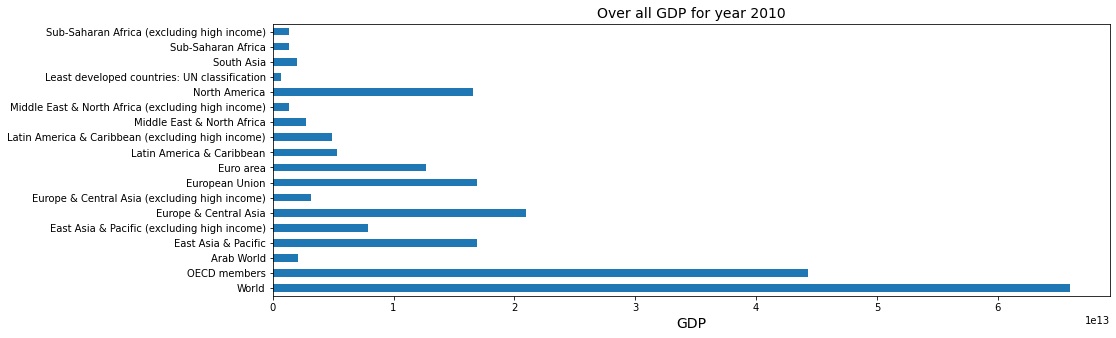

In [13]:
plt.rcParams['figure.figsize']=(15,5)
GDP_current_df['2010'].transpose().plot(kind='barh')
plt.title('Over all GDP for year 2010',fontsize=14)
plt.xlabel('GDP',fontsize=14)
plt.ylabel('',fontsize=14)
plt.show()

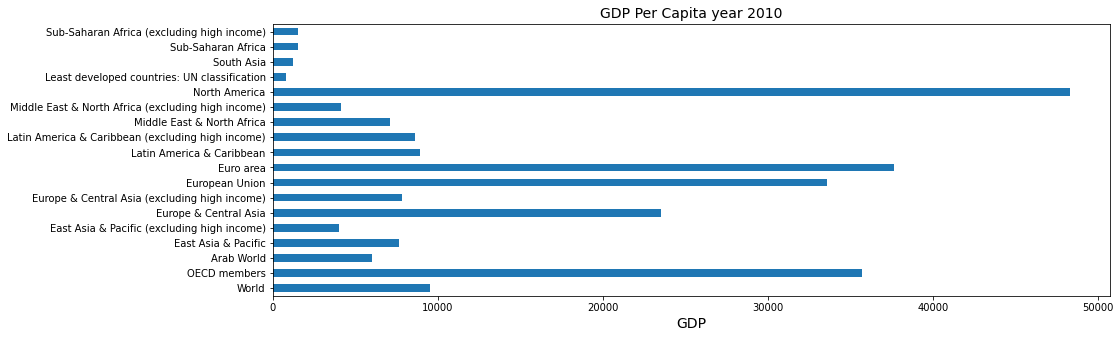

In [14]:
plt.rcParams['figure.figsize']=(15,5)
GDP_per_capita_df['2010'].transpose().plot(kind='barh')
plt.title('GDP Per Capita year 2010',fontsize=14)
plt.xlabel('GDP',fontsize=14)
plt.ylabel('',fontsize=14)
plt.show()

*****Population growth data from main data*****




In [15]:
population_growth =Income_df[Income_df['Indicator Code']=='SP.POP.GROW']


In [16]:
population_growth.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [17]:
graph_1=population_growth.transpose()

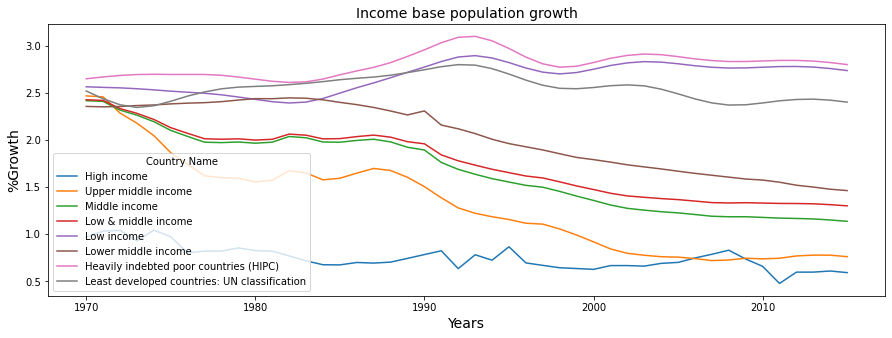

In [18]:
plt.rcParams['figure.figsize']=(15,5)
graph_1.plot()
plt.title('Income base population growth',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('%Growth',fontsize=14)
plt.show()

Global Mortality Rate

In [19]:
mortality_rate =Income_df[Income_df['Indicator Code']=='SH.DYN.MORT']

In [20]:
mortality_rate.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
mortality_rate = mortality_rate.transpose()

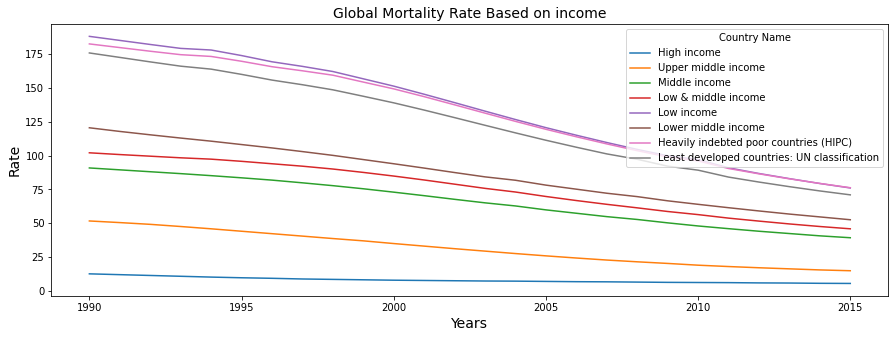

In [22]:
plt.rcParams['figure.figsize']=(15,5)
mortality_rate.plot()
plt.title('Global Mortality Rate Based on income',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Rate',fontsize=14)
plt.show()

Percent of population under 14

GDP Share

In [23]:
GDP_Share =Income_df[Income_df['Indicator Code']=='NY.GDP.MKTP.CD']

In [24]:
GDP_Share.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
quantity = GDP_Share['2010']
print(quantity)

Country Name
High income                                     4.520682e+13
Upper middle income                             1.579223e+13
Middle income                                   2.045861e+13
Low & middle income                             2.075124e+13
Low income                                      2.923397e+11
Lower middle income                             4.666965e+12
Heavily indebted poor countries (HIPC)          4.678519e+11
Least developed countries: UN classification    6.619345e+11
Name: 2010, dtype: float64


In [35]:
name = ['High income', 'Upper middle income','Middle income', 'Low & middle income','Low income', 'Lower middle income','Heavily indebted poor countries (HIPC)','Least developed countries: UN classification']

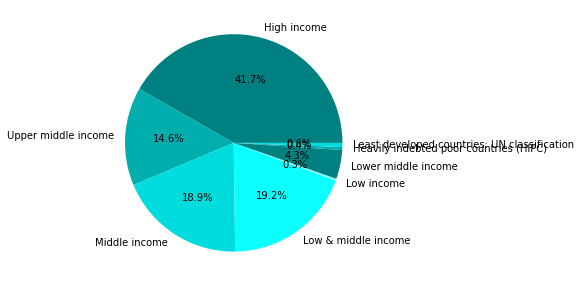

In [36]:
plt.pie(quantity,labels=name,autopct='%0.1f%%',colors = ['#008080','#00AEAE', '#00DCDC','#0BFFFF','#94FFFF'])
plt.show()

Pupil to teacher ratio

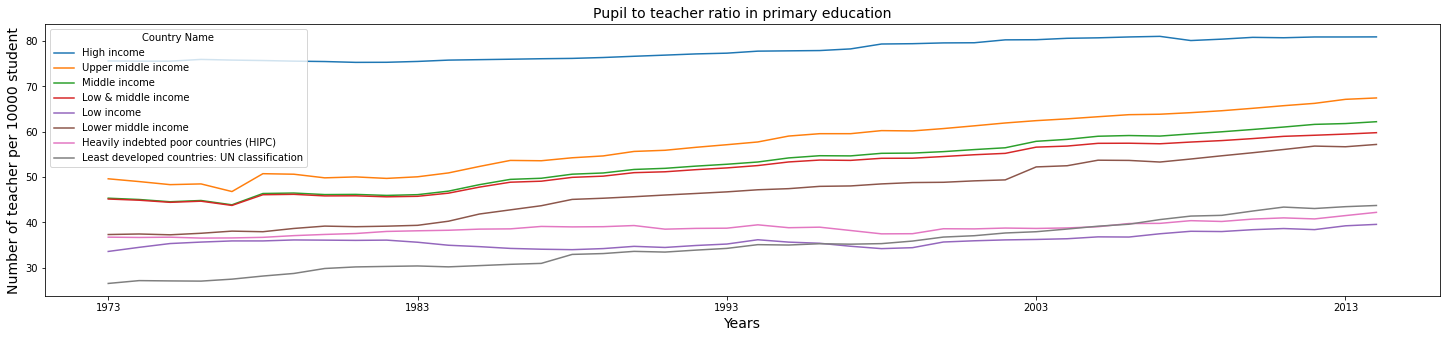

In [28]:
no_primary_enrollment =Income_df[Income_df['Indicator Code']=='SE.PRM.TCHR.FE.ZS']
graph_4b=no_primary_enrollment.transpose()
graph_4b.drop(['Indicator Name','Indicator Code'],axis=0,inplace=True)
graph_4b.dropna(inplace=True)
plt.rcParams['figure.figsize']=(25,5)
graph_4b.plot()
plt.title('Pupil to teacher ratio in primary education',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Number of teacher per 10000 student',fontsize=14)
plt.show()

Unemployment

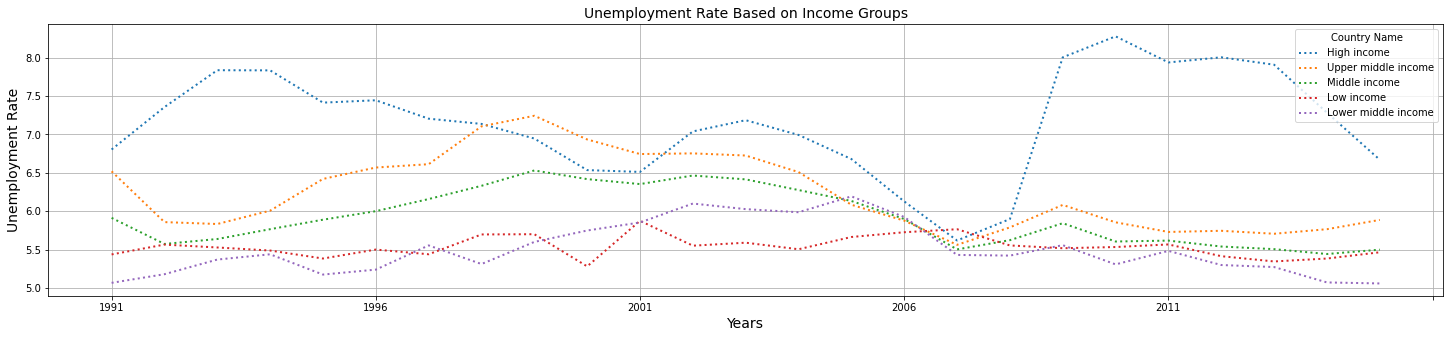

In [29]:
Unemployment =Income_df[Income_df['Indicator Code']=='SL.UEM.TOTL.ZS']
graph_5=Unemployment.transpose()
graph_5.drop(['Indicator Name','Indicator Code'],axis=0,inplace=True)
graph_5.drop(['Heavily indebted poor countries (HIPC)', 'Least developed countries: UN classification','Low & middle income'], axis=1,inplace=True)
graph_5.dropna(inplace=True)
plt.rcParams['figure.figsize']=(25,5)
graph_5.plot(linestyle=":",linewidth=2)
plt.grid(True)
plt.title('Unemployment Rate Based on Income Groups',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Unemployment Rate',fontsize=14)
plt.show()

World map

In [30]:
edu_df=pd.read_csv(path3)

In [31]:
govt_edu_df = edu_df[edu_df['Indicator Code']=='SE.XPD.TOTL.GD.ZS']        #% of GDP spending
# govt_edu_df = edu_df[edu_df['Indicator Code']=='SE.PRM.TCHR.FE.ZS']          #pupil to student ratio

In [32]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations = govt_edu_df['Country Code'],
    z = govt_edu_df ["2008"],
    text = govt_edu_df ['Country Name'],
    colorscale = 'Teal',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Economy<br>Class ',
))
fig.update_layout(
    title_text='Government expenditure on education as % of GDP (%)',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text = '',
        showarrow = False
    )]
)

fig.show()

# **Analysis Summry**
##**1. Analysis on income group**
From our previous analysis we came to know that Higher income countries constitute only about 1/4 in numbers and still controls 60% of world GDP. 

Despite making ⅓  in numbers, lower income countries have only about 0.5% of Global GDP share.  

This parity shows on multiple indicators such as population growth rate, Female enrolment in Tertiary Education, Teacher to Pupil Ratio, Mortality Rate.

On one hand the overall education level of high income countries has always been good, But over the years, especially over the last two decades the female enrolment  in tertiary education and labor force has increased exponentially.

On the other hand, lower income countries are still struggling for  any  significant improvement  in the education sector.
Middle income countries have shown consistent improvement in overall education, Be it Teacher to pupil ratio, percentage of population getting access to primary education, Female participation in all levels of education.

##**2.  Analysis by  Region**
From our analysis on the global GDP with respect to income groups on the world map  we can clearly see that high income countries are concentrated in Europe and North america.  

Most of the  low income Countries  are in Africa with few exceptions in the Middle  East(Afghanistan).

Middle income countries are spread  throughout the world with high concentration in Asia, with representation in Europe, Latin America,  Africa .

From all this analysis we are stating the obvious, Europe and North America being the center of education in the world due their world renowned institutes attracting talent from all across the Globe.

Whereas sub saharan Africa is constantly struggling to feed their population. With not enough resources to allocate towards education these countries have to rely on organizations such as World Bank and its sister organizations for basic necessities like food and education.

This trend also shows in the mortality rate being high in africa and low in europe and north america, and lack of education and awareness contributes towards high population growth in africa and relatively low population growth rate in europe and north america.

With some analysts stating that this century will be Asia’s century.Most of the emerging economies are from Asia, these emerging economies countries are spending a large percentage of their GDP towards educating their children and reeducating their labor force. 
 
##**3.  Analysis on Big Economies of the world**
The analysis on the big economies of the world over the last three decades shows the clear trend of   high government expenditure on education.

The analysis of labor force on these big economies shows a well educated(trained) labor force. India has the second largest trained labor force.

Even countries like Japan with a small aging population have a relatively large amount of educated labor force.
PISA reading scores and PISA mathematics scores show a clear picture of how the spending on education has been fruitful for these countries.

With the trend of technology integration in social life and a possibility of Metaverse, it is expected to see a further increase in education spending for these countries.      